# Multi-Label Classification with BERT


## Data Cleaning

In [2]:
import pandas as pd

In [3]:
true = pd.read_csv("../more-data/True.csv", error_bad_lines=False)

In [4]:
fake = pd.read_csv("../more-data/Fake.csv", error_bad_lines=False)

In [5]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
true["data"] = true.title + "\n" + true.text 

In [7]:
fake["data"] = fake.title + "\n" + fake.text 

In [8]:
true["label"] = 1

In [9]:
fake["label"] = 0

In [10]:
print(true["data"][[0]].values[0])

As U.S. budget fight looms, Republicans flip their fiscal script
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-

In [11]:
fake

,title,text,subject,date,data,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",McPain: John McCain Furious That Iran Treated ...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",How to Blow $700 Million: Al Jazeera America F...,0


In [12]:
true = true[["data", "label"]]

In [13]:
fake = fake[["data", "label"]]

In [14]:
data = pd.concat([true, fake], 0)

In [15]:
data = data.sample(frac=1)

In [16]:
data

,data,label
64,"Two Weeks Before Election, Trump Still Defend...",0
13382,PANIC! REUTERS/IPSOS Will Radically Change Way...,0
17057,Taliban kill at least 43 Afghan troops as they...,1
12699,YOU’RE FIRED! MITT ROMNEY’S NIECE Tells MI GOP...,0
1772,Melissa McCarthy Just Took On Sean Spicer’s ‘...,0
...,...,...
7305,Abe aims to underscore importance of Japan-U.S...,1
15653,OBAMA TO GRANT WORK PERMITS FOR SPOUSES OF ILL...,0
11271,Clinton expands on plan to tax wealthy as Sand...,1
6586,Cruz Trying To Hold Fiorina’s Hand Is More Aw...,0


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns
import json
from bs4 import BeautifulSoup
import unicodedata
import re
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
np.random.seed(10)

In [18]:
def remove_special_characters(text, remove_digits=False):
	pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
	text = re.sub(pattern, '', text)
	return text

## Next up, let's import everything we need. Run the following:

In [115]:
!pip install transformers

In [7]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 86 kB/s 
     |████████████████████████████████| 6.8 MB 18.3 MB/s 
     |████████████████████████████████| 981 kB 38.7 MB/s 
     |████████████████████████████████| 263 kB 34.7 MB/s 
     |████████████████████████████████| 2.8 MB 38.0 MB/s 
     |████████████████████████████████| 1.2 MB 43.2 MB/s 
     |████████████████████████████████| 468 kB 48.5 MB/s 
     |████████████████████████████████| 895 kB 40.6 MB/s 
     |████████████████████████████████| 59 kB 7.0 MB/s 
     |████████████████████████████████| 596 kB 31.1 MB/s 
     |████████████████████████████████| 3.3 MB 41.8 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=42f7941e5752c0d5e8e504fca78173c58c6fbaec3fe5977ac8e49efacd933b93
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=7587fd02c3361773a

In [19]:
import ktrain
from ktrain import text

In [20]:
tags = [0,1]

In [21]:
tags

[0, 1]

## Let's perform some data cleaning

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data["data"], data["label"], test_size=0.01, random_state = 10)

## STEP 1:  Preprocess Data and Create a Transformer Model

We will use BERT

In [ ]:
MODEL_NAME = 'bert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=10, classes=tags)
trn = t.preprocess_train(x_train.values, y_train.values)
val = t.preprocess_test(x_test.values, y_test.values)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, 
                             val_data=val, 
                             batch_size=6)

## STEP 2:  Train the Model

In [27]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
7408/7408 [==============================] - 1218s 160ms/step - loss: 2.6590 - accuracy: 0.6039


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


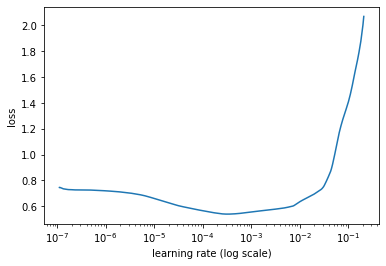

In [28]:
learner.lr_plot()

In [29]:
data

,data,label
64,"Two Weeks Before Election, Trump Still Defend...",0
13382,PANIC! REUTERS/IPSOS Will Radically Change Way...,0
17057,Taliban kill at least 43 Afghan troops as they...,1
12699,YOU’RE FIRED! MITT ROMNEY’S NIECE Tells MI GOP...,0
1772,Melissa McCarthy Just Took On Sean Spicer’s ‘...,0
...,...,...
7305,Abe aims to underscore importance of Japan-U.S...,1
15653,OBAMA TO GRANT WORK PERMITS FOR SPOUSES OF ILL...,0
11271,Clinton expands on plan to tax wealthy as Sand...,1
6586,Cruz Trying To Hold Fiorina’s Hand Is More Aw...,0


In [30]:
history = learner.fit(1e-5, 1)

7409/7409 [==============================] - 5778s 776ms/step - loss: 0.2197 - accuracy: 0.9096 - val_loss: 0.0982 - val_accuracy: 0.9666


## STEP 3: Evaluate and Inspect the Model

In [ ]:
learner.validate(class_names=t.get_classes())

Let's examine the validation examples about which we were the most wrong.

In [ ]:
learner.view_top_losses(n=5, preproc=t)

## STEP 4: Making Predictions on New Data in Deployment

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
# predicted probability scores for each category
predictor.predict_proba('Trump dies of laughter')

In [ ]:
predictor.get_classes()

## Reload saved Model

In [ ]:
reloaded_predictor = ktrain.load_predictor('bert-short-new-half-trained')

In [ ]:
reloaded_predictor.explain("HILLARY CLINTON FOR PRESIDENT")

## Now loading Test Set:

In [ ]:
fake_files = os.listdir("../data/New Folder/Fake")

In [ ]:
fake_files = [file for file in fake_files]

In [ ]:
fake_files

In [ ]:
real_files = os.listdir("../data/New Folder/Real")

In [ ]:
real_files = [file for file in real_files]

In [ ]:
real_files

In [ ]:
test_0 = []
test_1 = []
for file in fake_files:
    with open("../data/New Folder/Fake/"+file) as f:
        test_1.append(f.read())

for file in real_files:
    with open("../data/New Folder/Real/"+file) as f:
        test_0.append(f.read())
    

In [ ]:
x_val, y_val = test_0 + test_1, [0]*len(test_0) + [1]*len(test_1)

In [ ]:
trn = t.preprocess_train(x_train.values[:5000].tolist()+x_val, y_train.values[:5000].tolist()+y_val)
val = t.preprocess_test(x_val, y_val)

In [ ]:
MODEL_NAME = 'bert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=10, classes=tags)
trn = t.preprocess_train(x_train.values[:5000].tolist()+x_val, y_train.values[:5000].tolist()+y_val)
val = t.preprocess_test(x_val, y_val.values)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, 
                             val_data=val, 
                             batch_size=6)

In [ ]:
history2 = learner.fit(1e-5, 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [86]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [83]:
# predicted probability scores for each category
predictor.predict_proba('Hillary in hot water over her email server, again. Sacramento, CA — Democratic nominee Hillary Clinton is in hot water again after nearly 5 million uncounted California electronic ballots were found on her email server by the F.B.I. The majority of those ballots cast were by Bernie Sanders supporters. The election commission has an emergency meeting scheduled for tomorrow morning to discuss a possible vote recount which will include the newly-found ballots. Ms. Clinton has already come under fire during this election cycle over using her private email server for personal use, including storing and sending classified information with it. There has been a formal investigation, but no charges have been filed in that case. Some of the charges are facing several charges. Ms. Clinton’s public relations official released a brief statement saying, “Hillary does not know how those ballots ended up on her server. We are conducting an internal investigation into the matter.” These ballots could change the fortune of Bernie Sanders in his bid for the presidency as all the ballots found on Hillary’s server were cast votes cast for him, with the exception of the one write-in for Perot.')

array([0.9468409, 0.0531591], dtype=float32)

In [87]:
predictor.get_classes()

[0, 1]

## Evaluate and Inspect the Model

In [95]:
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       237
           1       0.94      0.95      0.94       212

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



array([[224,  13],
       [ 11, 201]], dtype=int64)